In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error




In [2]:
# CSV dosyasını doğru ayırıcı ile okuma
data_frame = pd.read_csv('C:/Users/Lenovo/Downloads/rapor.csv', delimiter=';')

# Sütun isimlerini kontrol etme
print(data_frame.columns)


Index(['Tarih', 'Büyükbaş hayvan sayısı (baş)', 'Küçükbaş hayvan sayısı (baş)',
       'Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)',
       'Toplam işlenen tarım alanı (hektar)',
       'Örtü altı sebze ve meyve üretim miktarı (ton)'],
      dtype='object')


In [3]:
# Sütun adlarındaki boşlukları temizleme
data_frame.columns = data_frame.columns.str.strip()

# Güncellenmiş sütun adlarını kontrol etme
print(data_frame.columns)


Index(['Tarih', 'Büyükbaş hayvan sayısı (baş)', 'Küçükbaş hayvan sayısı (baş)',
       'Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)',
       'Toplam işlenen tarım alanı (hektar)',
       'Örtü altı sebze ve meyve üretim miktarı (ton)'],
      dtype='object')


In [4]:
data_frame.head(100)

,Tarih,Büyükbaş hayvan sayısı (baş),Küçükbaş hayvan sayısı (baş),Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton),Toplam işlenen tarım alanı (hektar),Örtü altı sebze ve meyve üretim miktarı (ton)
0,2004,270.019,744.628,1.373.499,360.305,2.319
1,2005,292.727,836.232,1.624.259,362.943,3.079
2,2006,350.686,845.012,1.795.192,342.434,2.882
3,2007,400.795,821.424,1.683.245,334.084,2.515
4,2008,444.115,817.439,1.784.370,334.607,5.675
5,2009,456.079,749.379,1.668.617,330.740,5.988
6,2010,495.073,791.265,1.690.836,317.765,6.485
7,2011,512.844,825.532,1.750.697,305.533,7.370
8,2012,545.117,883.359,2.095.664,348.913,7.466
9,2013,565.073,993.693,2.164.171,329.496,7.085


In [5]:
data_frame.shape

(20, 6)

In [6]:
data_frame.isnull().sum()

Tarih                                                        0
Büyükbaş hayvan sayısı (baş)                                 0
Küçükbaş hayvan sayısı (baş)                                 0
Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)    0
Toplam işlenen tarım alanı (hektar)                          0
Örtü altı sebze ve meyve üretim miktarı (ton)                0
dtype: int64

In [7]:
print(data_frame.dtypes)

Tarih                                                          int64
Büyükbaş hayvan sayısı (baş)                                 float64
Küçükbaş hayvan sayısı (baş)                                  object
Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)     object
Toplam işlenen tarım alanı (hektar)                          float64
Örtü altı sebze ve meyve üretim miktarı (ton)                float64
dtype: object


In [8]:
# Tarih sütununu datetime formatına dönüştürme
data_frame['Tarih'] = pd.to_datetime(data_frame['Tarih'], format='%Y', errors='coerce')

# Tarih sütununu kontrol etme
print(data_frame['Tarih'].head())


0   2004-01-01
1   2005-01-01
2   2006-01-01
3   2007-01-01
4   2008-01-01
Name: Tarih, dtype: datetime64[ns]


In [9]:
data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].str.replace('.', '', regex=False)
#Verilerinizin içerisinde büyük sayılar yer almakta ve bu sayılar arasında binlik ayırıcı olarak nokta (.) kullanılmış. Bu, pd.to_numeric fonksiyonunun bu verileri dönüştürürken NaN değerler üretmesine neden olabilir çünkü nokta, ondalık ayırıcı olarak kabul edilir.

In [10]:
# `Küçükbaş hayvan sayısı (baş)` sütununu float türüne dönüştürme
data_frame['Küçükbaş hayvan sayısı (baş)'] = pd.to_numeric(data_frame['Küçükbaş hayvan sayısı (baş)'], errors='coerce')

# `Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)` sütununu float türüne dönüştürme
data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = pd.to_numeric(data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'], errors='coerce')

# Sütun veri tiplerini kontrol etme
print(data_frame.dtypes)


Tarih                                                        datetime64[ns]
Büyükbaş hayvan sayısı (baş)                                        float64
Küçükbaş hayvan sayısı (baş)                                        float64
Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)             int64
Toplam işlenen tarım alanı (hektar)                                 float64
Örtü altı sebze ve meyve üretim miktarı (ton)                       float64
dtype: object


In [11]:
# Dönüştürülemeyen değerleri bulma
non_convertible = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'][data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]

print("Dönüştürülemeyen değerler:")
print(non_convertible)


Dönüştürülemeyen değerler:
Series([], Name: Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton), dtype: int64)


In [12]:
print(data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].isna().sum())


0


In [13]:
data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].fillna(method='ffill')
data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].fillna(method='bfill')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17468\2915390396.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].fillna(method='ffill')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17468\2915390396.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'] = data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].fillna(method='bfill')


In [14]:
print(data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].isna().sum())

0


In [15]:
print(data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].head())
print(data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'].dtype)


0    1373499
1    1624259
2    1795192
3    1683245
4    1784370
Name: Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton), dtype: int64
int64


In [16]:
# Tarih sütunundaki tüm yılları kontrol et
print(data_frame['Tarih'].dt.year.unique())


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023]


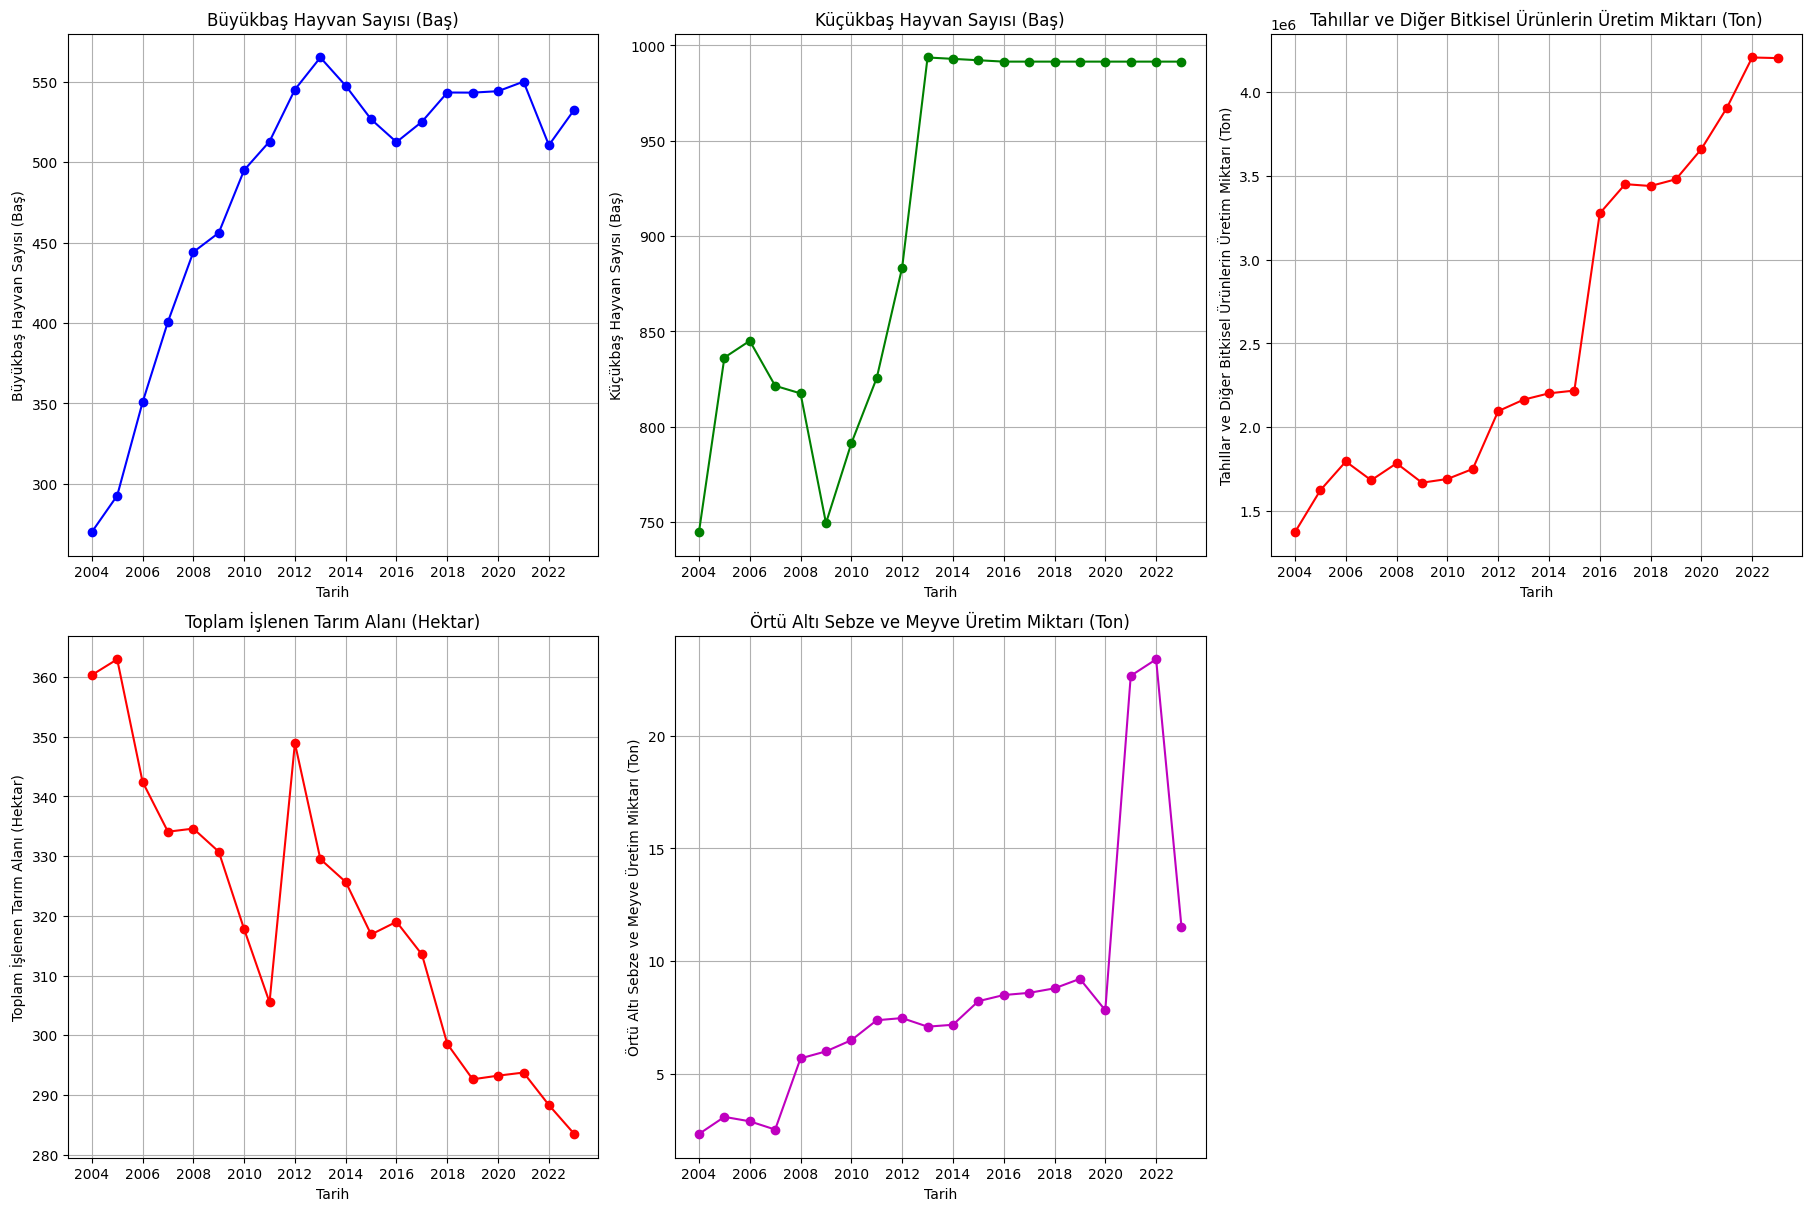

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek DataFrame yükleme veya oluşturma
# data_frame = pd.read_csv('your_file.csv')
data_frame = data_frame.interpolate(method='linear')
fig, axs = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

# Üstteki grafikler
axs[0, 0].plot(data_frame['Tarih'], data_frame['Büyükbaş hayvan sayısı (baş)'], marker='o', color='b')
axs[0, 0].set_title('Büyükbaş Hayvan Sayısı (Baş)')
axs[0, 0].set_xlabel('Tarih')
axs[0, 0].set_ylabel('Büyükbaş Hayvan Sayısı (Baş)')
axs[0, 0].grid(True)


axs[0, 1].plot(data_frame['Tarih'], data_frame['Küçükbaş hayvan sayısı (baş)'], marker='o', color='g')
axs[0, 1].set_title('Küçükbaş Hayvan Sayısı (Baş)')
axs[0, 1].set_xlabel('Tarih')
axs[0, 1].set_ylabel('Küçükbaş Hayvan Sayısı (Baş)')
axs[0, 1].grid(True)

axs[0, 2].plot(data_frame['Tarih'], data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'], marker='o', color='r')
axs[0, 2].set_title('Tahıllar ve Diğer Bitkisel Ürünlerin Üretim Miktarı (Ton)')
axs[0, 2].set_xlabel('Tarih')
axs[0, 2].set_ylabel('Tahıllar ve Diğer Bitkisel Ürünlerin Üretim Miktarı (Ton)')
axs[0, 2].grid(True)

# Alttaki grafikler
axs[1, 0].plot(data_frame['Tarih'], data_frame['Toplam işlenen tarım alanı (hektar)'], marker='o', color='r')
axs[1, 0].set_title('Toplam İşlenen Tarım Alanı (Hektar)')
axs[1, 0].set_xlabel('Tarih')
axs[1, 0].set_ylabel('Toplam İşlenen Tarım Alanı (Hektar)')
axs[1, 0].grid(True)

axs[1, 1].plot(data_frame['Tarih'], data_frame['Örtü altı sebze ve meyve üretim miktarı (ton)'], marker='o', color='m')
axs[1, 1].set_title('Örtü Altı Sebze ve Meyve Üretim Miktarı (Ton)')
axs[1, 1].set_xlabel('Tarih')
axs[1, 1].set_ylabel('Örtü Altı Sebze ve Meyve Üretim Miktarı (Ton)')
axs[1, 1].grid(True)

# Boş olan son ekseni kaldırmak için
fig.delaxes(axs[1, 2])

# Grafiklerin görüntülenmesi
plt.show()


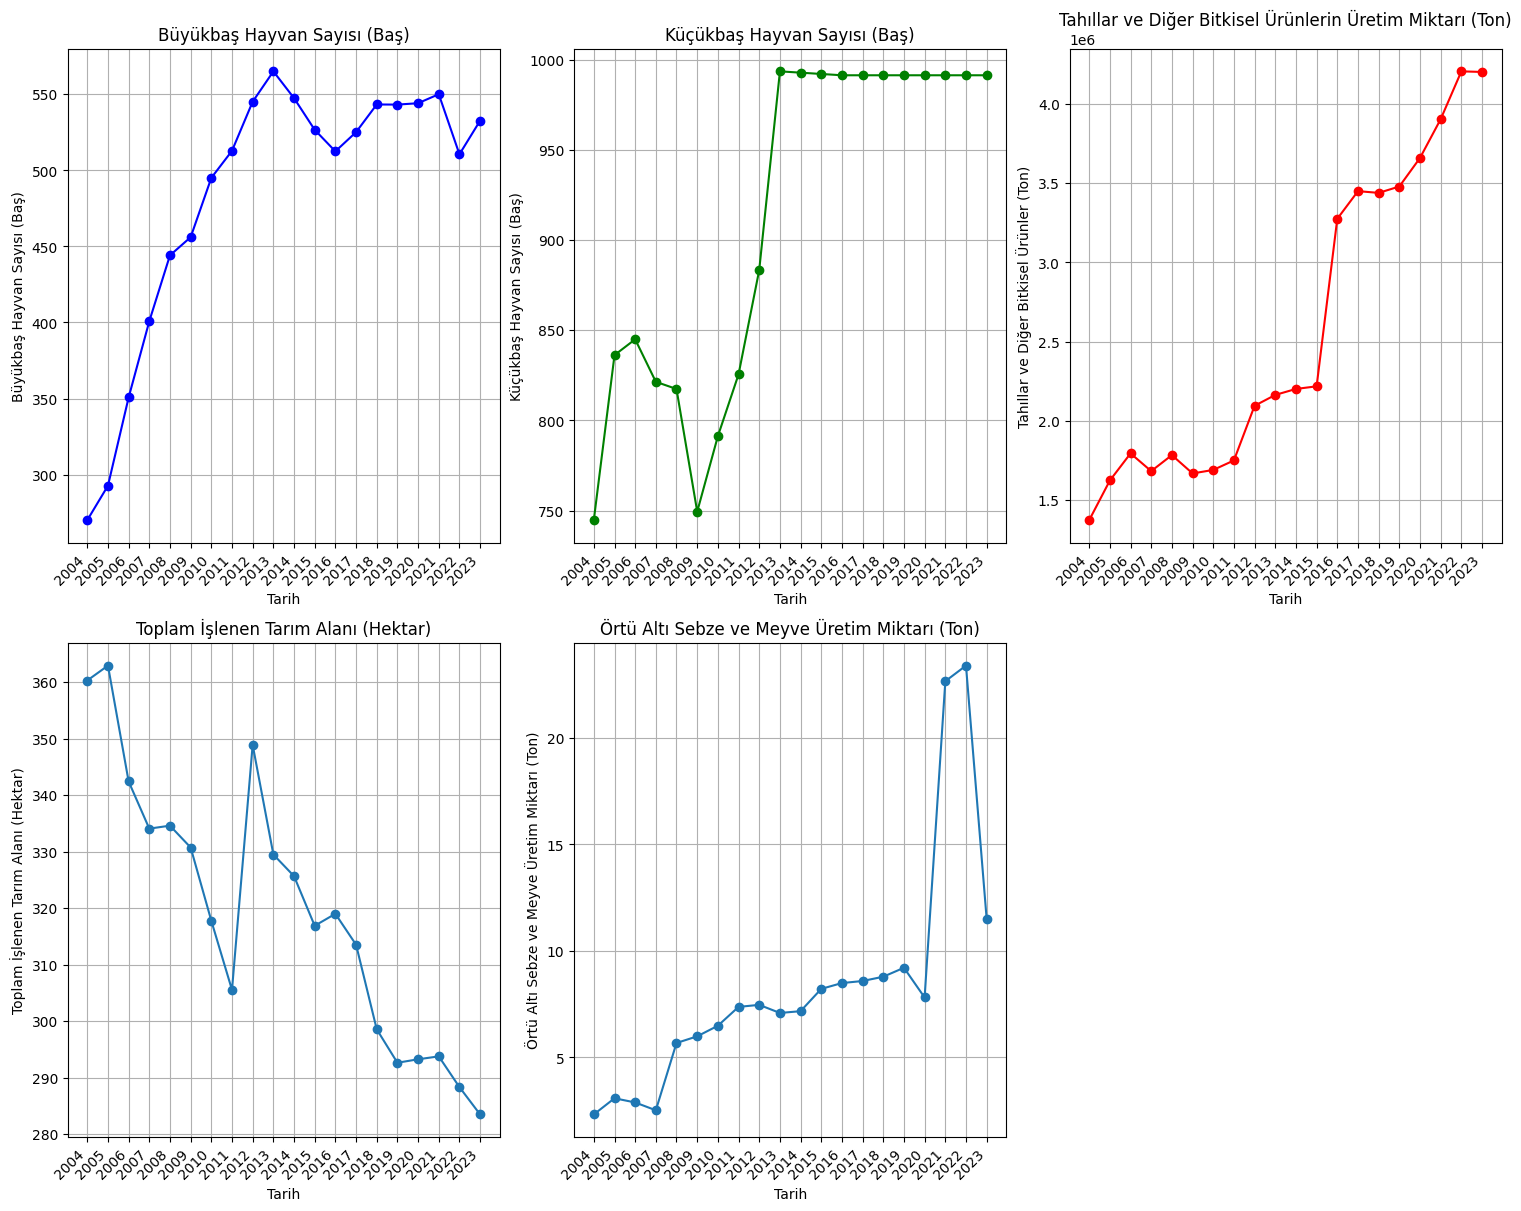

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Tarih sütununu datetime formatına dönüştürme
data_frame['Tarih'] = pd.to_datetime(data_frame['Tarih'], format='%Y')

fig, axs = plt.subplots(2, 3, figsize=(15, 12), constrained_layout=True)

# Üstteki grafikler
axs[0, 0].plot(data_frame['Tarih'], data_frame['Büyükbaş hayvan sayısı (baş)'], marker='o', color='b')
axs[0, 0].set_title('Büyükbaş Hayvan Sayısı (Baş)')
axs[0, 0].set_xlabel('Tarih')
axs[0, 0].set_ylabel('Büyükbaş Hayvan Sayısı (Baş)')
axs[0, 0].grid(True)
axs[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[0, 1].plot(data_frame['Tarih'], data_frame['Küçükbaş hayvan sayısı (baş)'], marker='o', color='g')
axs[0, 1].set_title('Küçükbaş Hayvan Sayısı (Baş)')
axs[0, 1].set_xlabel('Tarih')
axs[0, 1].set_ylabel('Küçükbaş Hayvan Sayısı (Baş)')
axs[0, 1].grid(True)
axs[0, 1].xaxis.set_major_locator(mdates.YearLocator())
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Alttaki grafikler
axs[0, 2].plot(data_frame['Tarih'], data_frame['Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)'], marker='o', color='r')
axs[0, 2].set_title('Tahıllar ve Diğer Bitkisel Ürünlerin Üretim Miktarı (Ton)')
axs[0, 2].set_xlabel('Tarih')
axs[0, 2].set_ylabel('Tahıllar ve Diğer Bitkisel Ürünler (Ton)')
axs[0, 2].grid(True)
axs[0, 2].xaxis.set_major_locator(mdates.YearLocator())
axs[0, 2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[1, 0].plot(data_frame['Tarih'], data_frame['Toplam işlenen tarım alanı (hektar)'], marker='o')
axs[1, 0].set_title('Toplam İşlenen Tarım Alanı (Hektar)')
axs[1, 0].set_xlabel('Tarih')
axs[1, 0].set_ylabel('Toplam İşlenen Tarım Alanı (Hektar)')
axs[1, 0].grid(True)
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[1, 1].plot(data_frame['Tarih'], data_frame['Örtü altı sebze ve meyve üretim miktarı (ton)'], marker='o')
axs[1, 1].set_title('Örtü Altı Sebze ve Meyve Üretim Miktarı (Ton)')
axs[1, 1].set_xlabel('Tarih')
axs[1, 1].set_ylabel('Örtü Altı Sebze ve Meyve Üretim Miktarı (Ton)')
axs[1, 1].grid(True)
axs[1, 1].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Tarih etiketlerini döndür
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


fig.delaxes(axs[1, 2])

# Grafiklerin görüntülenmesi
plt.show()


In [19]:
data_frame = data_frame.drop(columns=['Tarih'])

In [20]:
data_frame.columns

Index(['Büyükbaş hayvan sayısı (baş)', 'Küçükbaş hayvan sayısı (baş)',
       'Tahıllar ve diğer bitkisel ürünlerin üretim miktarı (ton)',
       'Toplam işlenen tarım alanı (hektar)',
       'Örtü altı sebze ve meyve üretim miktarı (ton)'],
      dtype='object')

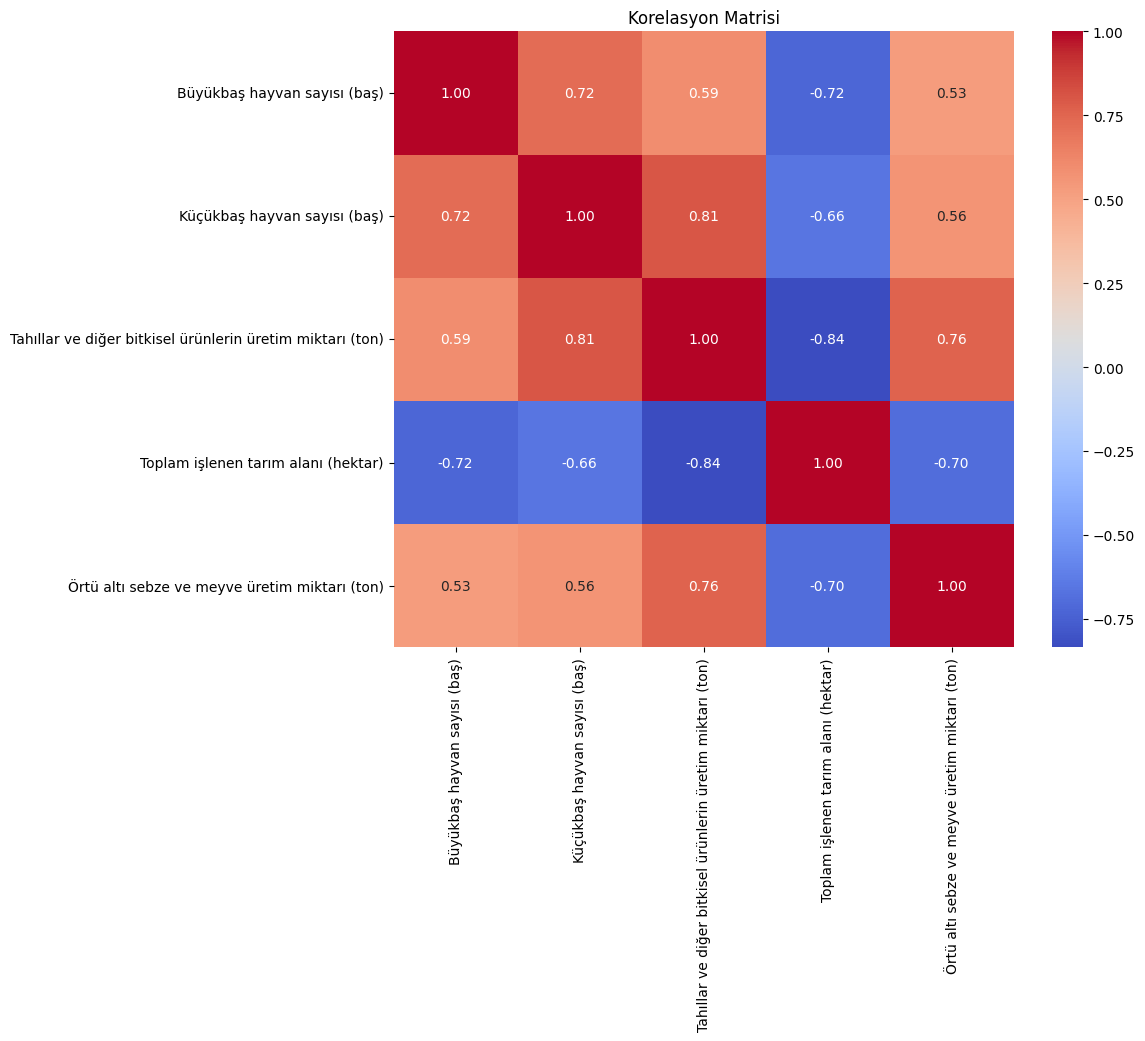

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplayın
korelasyon_matrisi = data_frame.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()